# Reading and plotting simulation output

In [1]:
import microval.simulation as msim
import microval.experiment as mexp
import matplotlib.pyplot as plt
import numpy as np

Parameters to adjust.

In [2]:
## Simulation output
# Heatmap as image file
simulation_image_file = r"P8_SDV183.png"
# Simulated region
ebsd_extend_P8 = (0.0, 856.2000300000001, 30.484095, 499.523474)

## For overlay plot
# Paths to experimental *.mat files
binaraydata_mat_file_name = r"image_time_series_red.mat"
segmenteddata_mat_file_name = r"foreground_mask.mat"
fatiguedata_mat_file_name = r"fatigue_data_red.mat"
# Scale factor for conversion of image data to physical domain
scale_factor = 0.6

## Simulation output

Read simulation output and transform appropriately.

In [3]:
sim = msim.SimulationResult(simulation_image_file)
sim.flip(updown=False, leftright=True)
sim.transform_to(ebsd_extend_P8)

Plot image.

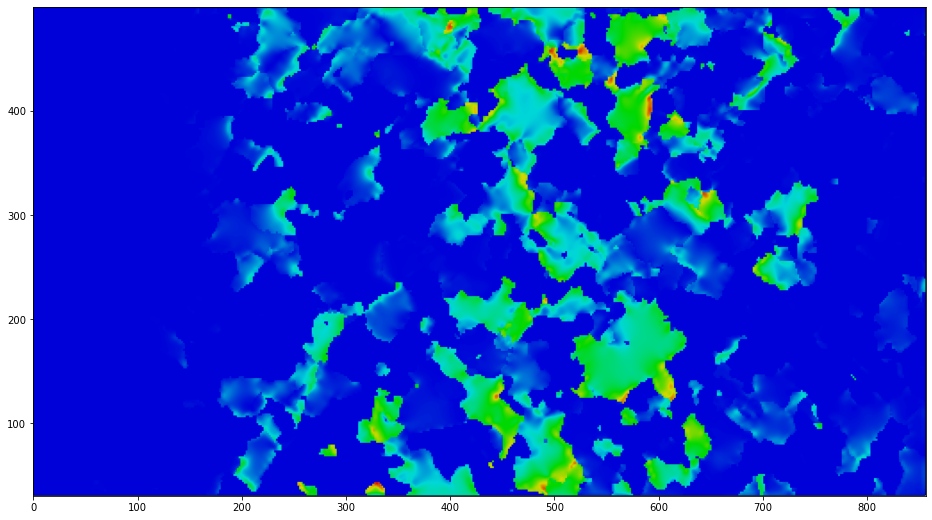

In [4]:
fig=plt.figure(figsize=(16,9))
sim.imshow()

## Overlay simulation with binary data

Read binary data and plot overlay.

\\fe00fs45.de.bosch.com\nae2rng$\10_script\micro-fat-val-framework\script\microval\microval\__init__.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(X,


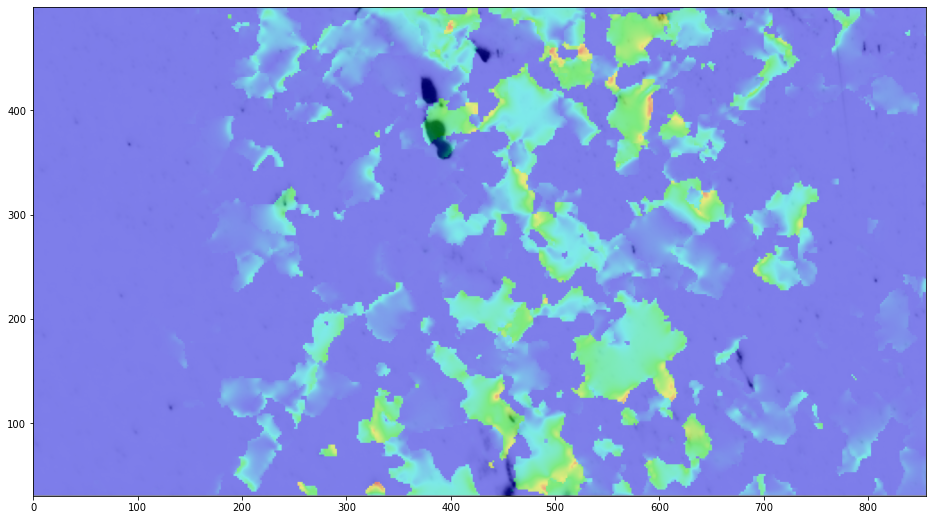

In [5]:
bindat = mexp.BinaryData(binaraydata_mat_file_name=binaraydata_mat_file_name, fatiguedata_mat_file_name=fatiguedata_mat_file_name)
fig=plt.figure(figsize=(16,9))
sim.imshow() 
bindat.imshow(scale_factor = scale_factor, time_step_number = bindat.get_num_binary_data()-1, alpha = 0.5, region = ebsd_extend_P8)

## Overlay simulation with SEM data

Overlay simulation results with SEM image data. Plot the latter as black points irrespective of the segmentation result (cracks/extrusions) for simplicity.

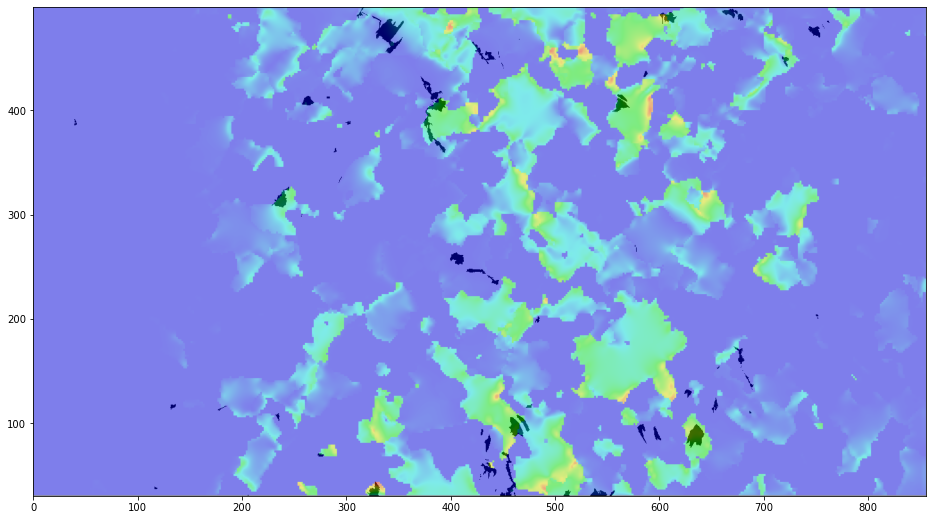

In [6]:
segdat = mexp.SegmentedData(segmenteddata_mat_file_name=segmenteddata_mat_file_name,fatiguedata_mat_file_name=fatiguedata_mat_file_name)
fig=plt.figure(figsize=(16,9))
sim.imshow()
segdat.imshow(scale_factor = scale_factor, as_binary = True, invert_blackwhite=True, alpha=0.5, region = ebsd_extend_P8)